In [1]:
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, GlobalAvgPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
y_train = train_df["label"].values
x_train = train_df[train_df.keys().drop(["label"])].values.reshape(-1,28,28,1)
x_train = x_train/255

In [4]:
test = test_df.values
test = test/255
test = test.reshape(-1, 28,28,1)

In [5]:
y_train = to_categorical(y_train, num_classes=10)

In [6]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

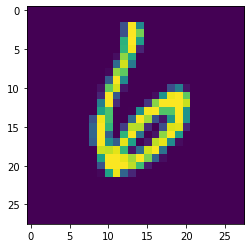

In [8]:
plt.imshow(x_train[0][:,:,0])

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1), activation="relu", padding="Same"))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding="Same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="Same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="Same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="Same"))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="Same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)      

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
igen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1
)
igen.fit(x_train)

In [12]:
lr = ReduceLROnPlateau(min_lr=0.00001, patience=4, verbose=1, monitor="loss")

In [13]:
model.fit(igen.flow(x_train, y_train, batch_size=16), epochs=100, validation_data=(x_val, y_val),
         verbose = 2, steps_per_epoch=x_train.shape[0] // 16, callbacks=[lr])

Epoch 1/100
 - 27s - loss: 0.3700 - accuracy: 0.8829 - val_loss: 0.0698 - val_accuracy: 0.9804
Epoch 2/100
 - 24s - loss: 0.1381 - accuracy: 0.9607 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 3/100
 - 24s - loss: 0.1085 - accuracy: 0.9686 - val_loss: 0.0571 - val_accuracy: 0.9849
Epoch 4/100
 - 24s - loss: 0.0917 - accuracy: 0.9731 - val_loss: 0.0385 - val_accuracy: 0.9874
Epoch 5/100
 - 24s - loss: 0.0866 - accuracy: 0.9750 - val_loss: 0.0456 - val_accuracy: 0.9860
Epoch 6/100
 - 24s - loss: 0.0818 - accuracy: 0.9765 - val_loss: 0.0390 - val_accuracy: 0.9892
Epoch 7/100
 - 24s - loss: 0.0763 - accuracy: 0.9785 - val_loss: 0.0335 - val_accuracy: 0.9895
Epoch 8/100
 - 23s - loss: 0.0721 - accuracy: 0.9797 - val_loss: 0.0334 - val_accuracy: 0.9906
Epoch 9/100
 - 23s - loss: 0.0683 - accuracy: 0.9809 - val_loss: 0.0282 - val_accuracy: 0.9911
Epoch 10/100
 - 23s - loss: 0.0650 - accuracy: 0.9820 - val_loss: 0.0309 - val_accuracy: 0.9899
Epoch 11/100
 - 24s - loss: 0.0669 - accuracy: 0.

 - 24s - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0197 - val_accuracy: 0.9958
Epoch 85/100
 - 24s - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0194 - val_accuracy: 0.9958
Epoch 86/100
 - 24s - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0193 - val_accuracy: 0.9960
Epoch 87/100
 - 24s - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.0193 - val_accuracy: 0.9958
Epoch 88/100
 - 24s - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0194 - val_accuracy: 0.9957
Epoch 89/100
 - 24s - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0193 - val_accuracy: 0.9958
Epoch 90/100
 - 24s - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0195 - val_accuracy: 0.9954
Epoch 91/100
 - 24s - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.0194 - val_accuracy: 0.9955
Epoch 92/100
 - 25s - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0192 - val_accuracy: 0.9954
Epoch 93/100
 - 27s - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0196 - val_accuracy: 0.9956
Epoch 94/100
 - 24s - loss: 0.0126 - accuracy: 0.9962

In [14]:
result = model.predict(test)

In [15]:
result = np.argmax(result, axis=1)

In [16]:
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [17]:
sub = pd.read_csv("sample_submission (1).csv")

In [18]:
sub["Label"] = result

In [19]:
sub.to_csv("try4.csv", index=False)